In [357]:

## impports very important libraries run this cell first (TeaToCodeConverter)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sweetviz as sv
#import tensorflow as tf


# Data Imports

importing unlabeled  data as U1
importing labeled data as L1

In [358]:
u1 = pd.read_csv("../DataSets/Breast cancer dataset/breast-cancer-wisconsin.data",header=None,index_col=0)
l1 = pd.read_csv("../DataSets/Breast cancer dataset/breast-cancer-wisconsin.data",header=None, names=['id','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class1'],index_col=0)
u1.head()
l1.head()
#print(u1.head())
#print("l1")
#print(l1.head())


,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class1
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [359]:
l1.dtypes

clump_thickness                 int64
uniformity_of_cell_size         int64
uniformity_of_cell_shape        int64
marginal_adhesion               int64
single_epithelial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
class1                          int64
dtype: object

In [360]:
#Clean up the data
l1['class1'].replace({2:0,4:1},inplace=True)
l1
analysis = sv.analyze(l1)
analysis.show_html('EDA-Sweetviz2predrop.html', open_browser=False)

/home/scv1alpha/.local/lib/python3.9/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/scv1alpha/.local/lib/python3.9/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: clump_thickness                     |▉         | [  9%]   00:00 -> (00:00 left)/home/scv1alpha/.local/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
Feature: uniformity_of_cell_size             |█▊        | [ 18%]   00:00 -> (00:00 left)/home/scv1alpha/.local/lib/python3.9/site-packa

Report EDA-Sweetviz2predrop.html was generated.


Sweetvis summary



In [361]:
# split the dataset
x=l1.drop('class1',axis=1)
y=l1['class1']
x



,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
id,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1
1002945,5,4,4,5,7,10,3,2,1
1015425,3,1,1,1,2,2,3,1,1
1016277,6,8,8,1,3,4,3,7,1
1017023,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2,1,1,1
841769,2,1,1,1,2,1,1,1,1
888820,5,10,10,3,7,3,8,10,2


In [362]:
# Summary of the dataset

analysis = sv.analyze(l1, target_feat='class1')
analysis.show_html('EDA-Sweetviz2.html', open_browser=False)


/home/scv1alpha/.local/lib/python3.9/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/scv1alpha/.local/lib/python3.9/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: class1 (TARGET)                     |▉         | [  9%]   00:00 -> (00:00 left)/home/scv1alpha/.local/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
Feature: clump_thickness                     |█▊        | [ 18%]   00:00 -> (00:00 left)/home/scv1alpha/.local/lib/python3.9/site-packa

Report EDA-Sweetviz2.html was generated.


In [363]:
#Dislay resuls in the notebook
import IPython
ip = IPython.display.IFrame(src='EDA-Sweetviz2.html', width=1000, height=600)


# using Sklearn to classify the class data and plot some graphs

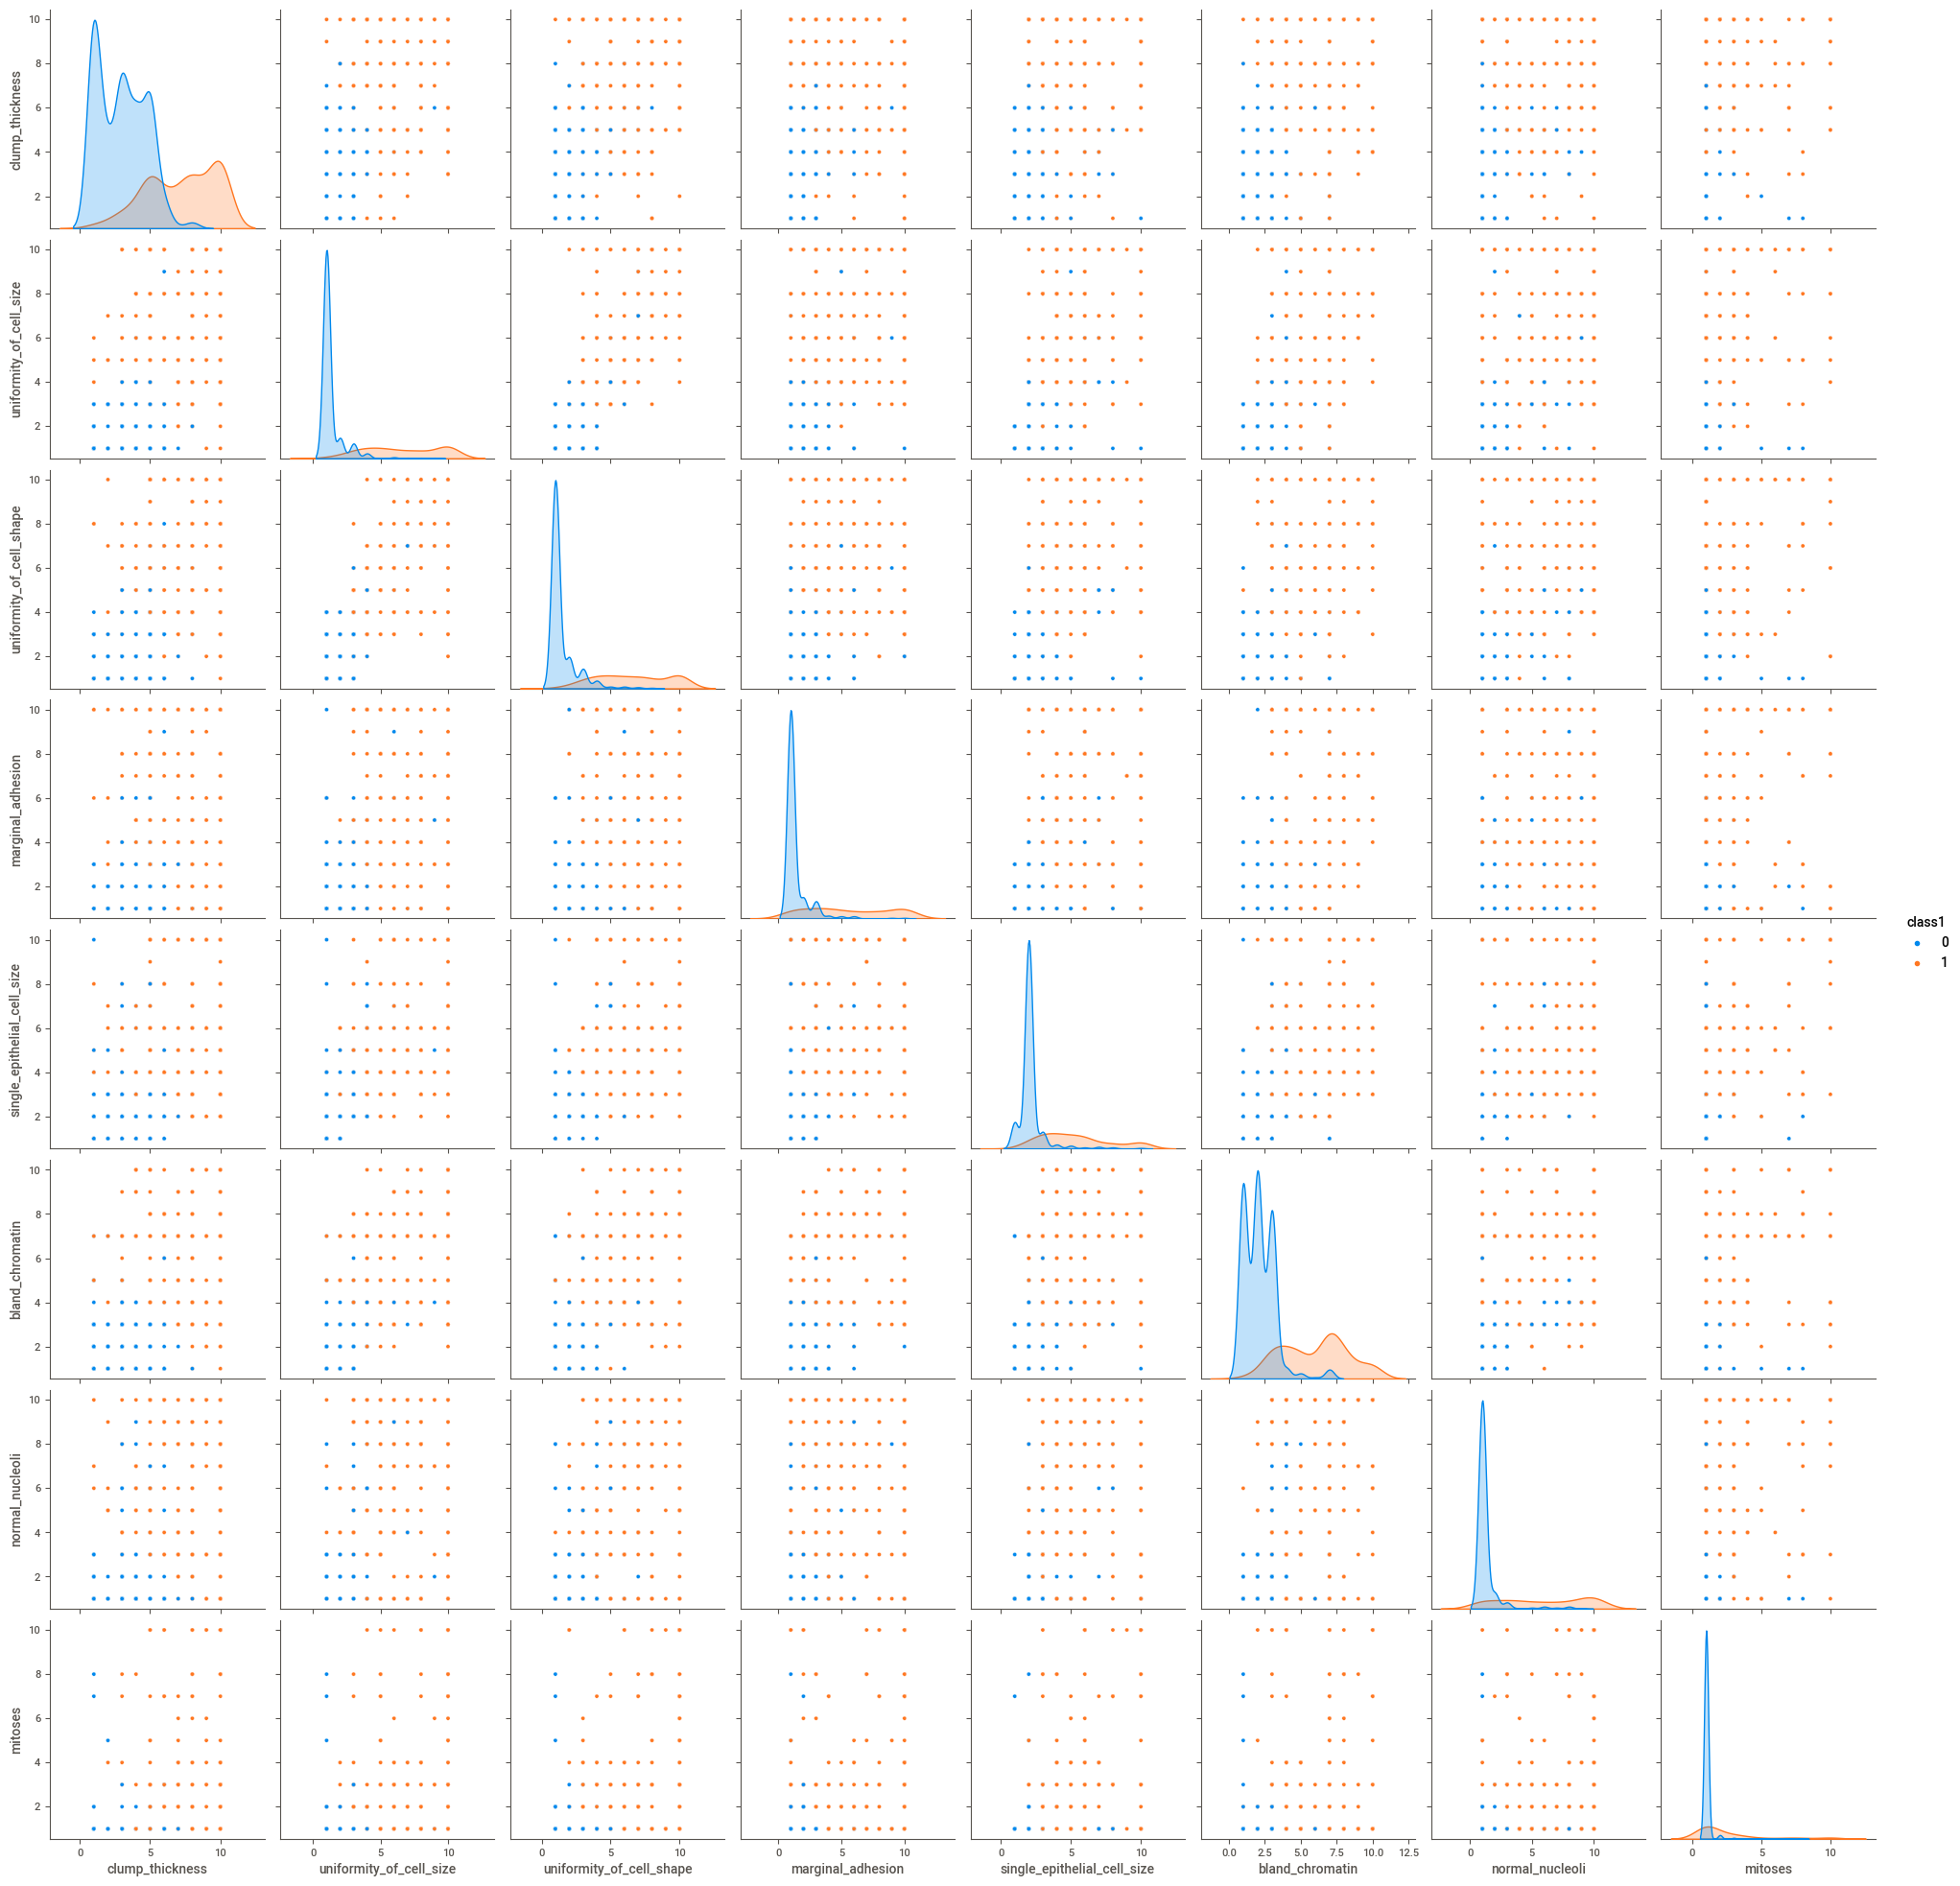

In [364]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
l1.class1 = labelencoder_y.fit_transform(l1.class1.values)

sns.pairplot(l1, hue='class1')

#reencode entire dataframe
l1 = l1.apply(LabelEncoder().fit_transform)

<AxesSubplot: >

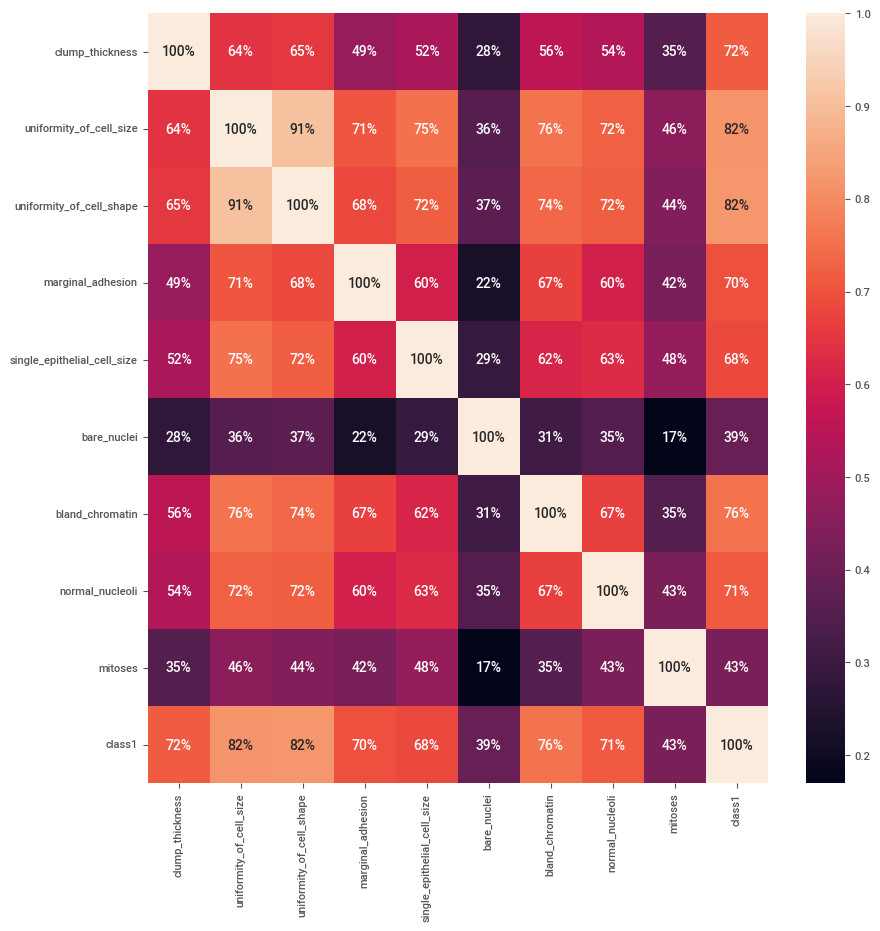

In [365]:
#get the correlation of the columns
l1.corr()

#visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(l1.corr(), annot=True, fmt='.0%')

# Splitting the data into training and testing sets

In [366]:
# split the data into independent 'X' and dependent 'Y' variables

X=l1.drop('class1',axis=1)

Y=l1['class1']

# Splitting the data into training and testing sets


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [367]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [368]:
#without scaling funtion for the models
def models(X_train,Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
    dtc.fit(X_train, Y_train)
    
    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)

    #print model accuracy on the training data.

    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]Decision Tree Classifier Training Accuracy:', dtc.score(X_train, Y_train))
    print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

    return log, dtc, forest




In [369]:
#Getting all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9588550983899821
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 1.0


In [370]:
#test model accuracy on test data on confusion matrix for the models

from sklearn.metrics import confusion_matrix
for i in model:
    print('Model ', i)
    cm = confusion_matrix(Y_test, i.predict(X_test))
    #TN, FP, FN, TP variables
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]

    print(cm)
    ## really important to formula it is the accuracy of the model
    print('Testing Accuracy = "{}!"'.format( (TP + TN) / (TP + TN + FN + FP)))
    

Model  LogisticRegression(random_state=0)
[[82  3]
 [ 3 52]]
Testing Accuracy = "0.9571428571428572!"
Model  DecisionTreeClassifier(criterion='entropy', random_state=0)
[[79  6]
 [ 5 50]]
Testing Accuracy = "0.9214285714285714!"
Model  RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
[[83  2]
 [ 1 54]]
Testing Accuracy = "0.9785714285714285!"


In [371]:
#testing from other libaries

In [372]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model ', i)
    # Check precision, recall, f1-score
    print( classification_report(Y_test, model[i].predict(X_test)) )
    # Another way to get the models accuracy on the test data
    print( accuracy_score(Y_test, model[i].predict(X_test)))
    print()

Model  0
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        85
           1       0.95      0.95      0.95        55

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

0.9571428571428572

Model  1
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        85
           1       0.89      0.91      0.90        55

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140

0.9214285714285714

Model  2
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        85
           1       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighte

#classify the data using the random forest classifier

In [373]:
pred=model[2].predict(X_test)
print(pred.tolist())
print()
print(Y_test.tolist())


[0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0]

[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0]


In [374]:
#visualizing the desicion tree
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

features = list(l1.columns[1:])


In [375]:
dtc = model[1]
#print(dir(model[1]))

DecisionTreeClassifier(criterion='entropy', random_state=0)

NameError: name 'dtc' is not defined

# Comparison report

In [ ]:
compare_report = sv.compare([x_train, 'Train'], [x_test, 'Test'], 'class1')
compare_report.show_html('EDA-Sweetviz-Compare2.html', open_browser=False)
